##**E-commerce Data**

This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers.

The marketing and sales manager requires some insights on customer behaviour and spending habits at the company to guide the development of a new marketing strategy.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
records = data.shape[0]

missing_data = data.isnull().sum()

print(f'Count of total records:{records}')
print(f'Count of null values:{missing_data}')

pct_missing_data = round((missing_data['CustomerID']/records)*100, 2)

print(f'{pct_missing_data}% of the unique customer IDs are not in the dataset')

Count of total records:541909
Count of null values:InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
24.93% of the unique customer IDs are not in the dataset


In [ ]:
#count how many InvoiceNos apply to one customerID

cust_invoice = data.groupby('CustomerID')['InvoiceNo'].value_counts()

cust_invoice

CustomerID  InvoiceNo
12346       541431        1
            C541433       1
12347       573511       47
            537626       31
            542237       29
                         ..
G99995      570187        1
G99996      570187        1
G99997      570187        1
G99998      570187        1
G99999      570187        1
Name: count, Length: 157270, dtype: int64

####The above grouping proves that one customer could have repeated InvoiceNos when they purchase more than one item at a time. This one to many relationship can be used to account for missing CustomerID values where there is an existing InvoiceNo which matches. But let's test this first

In [ ]:
#Separate known and guest rows
known_customers = data[data['CustomerID'].notna()]
guests = data[data['CustomerID'].isna()]

#Map InvoiceNos to non-null customerID values
invoice_to_customer = known_customers.drop_duplicates(subset='InvoiceNo')[['InvoiceNo', 'CustomerID']]

#Merge to assign CustomerID to guest rows
guests_filled = guests.merge(invoice_to_customer, on='InvoiceNo', how='left')

final_data = pd.concat([
    known_customers,
    guests_filled.assign(CustomerID=guests_filled['CustomerID_y']).drop(columns=['CustomerID_x', 'CustomerID_y'])
])


In [ ]:
final_data.head()

final_data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


####We still have the same number of missing CustomerID rows from the original dataset. Which means we can classify all missing customerIDs with unique idenitifers starting with 'G' for guest.

In [ ]:
#since one of the goals is to analyze the rfm of each customer, how do we account for missing customer ID?

data['CustomerID'] = data['CustomerID'].dropna().astype(int).astype(str)

# Identify rows with null CustomerID
null_ids = data['CustomerID'].isnull()

# Generate dummy IDs: G0001, G0002, ...
dummy_ids = ['G' + str(i).zfill(4) for i in range(1, null_ids.sum() + 1)]

# Assign dummy IDs
data.loc[null_ids, 'CustomerID'] = dummy_ids


In [ ]:
check_missing_data = data['CustomerID'].isnull().sum()

print(f'{check_missing_data}' + ' null values in CustomerID column')

data.dtypes

0 null values in CustomerID column


,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object


In [ ]:
#The stockcode column represents unique identifiers for each product.

unique_values = data['StockCode'].value_counts()

#Since the description column also had missing values, check the stockcode column to see if there are any duplicates

duplicates_only = unique_values[unique_values > 1]

count_duplicates = len(duplicates_only)

print(count_duplicates)

3837


In [ ]:
#for each duplicate value in the stockcode column, determine whether the description is the same

duplicates = data[data['StockCode'].isin(duplicates_only.index)][['StockCode', 'Description']]

#Sort by StockCode and Description to see matches together
duplicates = duplicates.sort_values(by=['StockCode', 'Description'])

duplicates.head(50)


,StockCode,Description
31,10002,INFLATABLE POLITICAL GLOBE
142,10002,INFLATABLE POLITICAL GLOBE
4272,10002,INFLATABLE POLITICAL GLOBE
5466,10002,INFLATABLE POLITICAL GLOBE
5546,10002,INFLATABLE POLITICAL GLOBE
6166,10002,INFLATABLE POLITICAL GLOBE
7598,10002,INFLATABLE POLITICAL GLOBE
10168,10002,INFLATABLE POLITICAL GLOBE
11382,10002,INFLATABLE POLITICAL GLOBE
15050,10002,INFLATABLE POLITICAL GLOBE


####The output shows that the description of each product is based on its unique stockcode. Replace the null values in the description column with the right description based on its stockcode

In [ ]:
#Define function to fill empty description rows
def fill_description(row):
    if pd.isna(row['Description']):
        # Look for any non-null descriptions for the same StockCode
        matches = data.loc[
            (data['StockCode'] == row['StockCode']) &
            (data['Description'].notna()), 'Description'
        ]
        if not matches.empty:
            return matches.iloc[0]  # Return the first found description
        else:
            return "No description"
    return row['Description']

data['Description'] = data.apply(fill_description, axis=1)


In [ ]:
#test to see if function was successful

missing_descriptions = data['Description'].isnull().sum()
missing_data = data.isnull().sum()
print(missing_descriptions)
print(missing_data)

0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
#check the 'G' CustomerID rows to check if there are repeated InvoiceIDs

guest_rows = data[data['CustomerID'].str.startswith('G')]

guest_rows_check = guest_rows.groupby('CustomerID')['InvoiceNo'].value_counts()

guest_rows_check

,,count
CustomerID,InvoiceNo,
G0001,536414,1
G0002,536544,1
G0003,536544,1
G0004,536544,1
G0005,536544,1
...,...,...
G99995,570187,1
G99996,570187,1
G99997,570187,1


In [ ]:
#repeated InvoiceIds shows a mapping issue. Map one unique InvoiceId in the guest_rows dataframe to repeated InvoiceNos

# Filter rows with placeholder CustomerIDs starting with 'G'
placeholder_mask = data['CustomerID'].str.startswith('G')
placeholder_data = data[placeholder_mask]

# Get the first placeholder CustomerID per InvoiceNo
first_customer_map = (
    placeholder_data.groupby('InvoiceNo')['CustomerID']
    .first()
    .to_dict()
)

# Map each InvoiceNo to its consistent CustomerID
corrected_ids = placeholder_data['InvoiceNo'].map(first_customer_map)

# Flag reassigned rows
data['Reassigned'] = False
data.loc[placeholder_data.index, 'Reassigned'] = (
    data.loc[placeholder_data.index, 'CustomerID'] != corrected_ids
)

#Replace inconsistent CustomerIDs with the first one per InvoiceNo
data.loc[placeholder_data.index, 'CustomerID'] = corrected_ids



In [ ]:
#test to see if it worked

check_guest_rows = data[data['CustomerID'].str.startswith('G')]

check_guest_rows_check = check_guest_rows.groupby('CustomerID')['InvoiceNo'].value_counts()

check_guest_rows_check

,,count
CustomerID,InvoiceNo,
G0001,536414,1
G0002,536544,527
G0529,536545,1
G0530,536546,1
G0531,536547,1
...,...,...
G99932,570112,1
G99933,570120,1
G99934,570185,1


In [ ]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object
Reassigned,bool


Great! Now that all missing values have been accounted for and the data has been properly validated, we can begin the RFM analysis.

In [ ]:
#RFM analysis

#Recency

print(data['InvoiceDate'].max())

day = '2012-01-01'
day = pd.to_datetime(day)

recency = data.groupby(['CustomerID']).agg({"InvoiceDate": lambda x: (day - x.max()).days})

recency

2011-12-09 12:50:00


,InvoiceDate
CustomerID,
12346,347
12347,24
12348,97
12349,40
12350,332
...,...
G99932,85
G99933,85
G99934,85


In [ ]:
#frequency

freq = (
    data.drop_duplicates(subset="InvoiceNo")
        .groupby('CustomerID')['InvoiceNo']
        .count()
        .to_frame(name='Frequency')  # Keeps CustomerID as index
)

freq.head()

,Frequency
CustomerID,
12346,2
12347,7
12348,4
12349,1
12350,1


In [ ]:
#Monetary

#use the total amount paid by each customer per invoice

data["total"] = data['UnitPrice']*data['Quantity']



In [ ]:
money = data.groupby(['CustomerID'])[['total']].sum()

money

,total
CustomerID,
12346,0.00
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
...,...
G99932,0.00
G99933,0.00
G99934,0.00


In [ ]:
#Customer 12346 recorded 0 sales. why?

data[data['CustomerID'] == '12346'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Reassigned,total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,False,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,False,-77183.6


Customer 12346's order was cancelled and was granted a full refund

In [ ]:
#RFM analysis

RFM = pd.concat([recency, freq, money], axis = 1)
recency.columns = ['recency']
freq.columns = ['frequency']
money.columns = ['monetary']

RFM.head()

,recency,frequency,monetary
CustomerID,,,
12346,347,2,0.00
12347,24,7,4310.00
12348,97,4,1797.24
12349,40,1,1757.55
12350,332,1,334.40


In [ ]:
RFM.isna().sum()

,0
recency,0
frequency,0
monetary,0


In [ ]:
#standardize the rfm dataframe for clustering

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

RFM_scaled = scaler.fit_transform(RFM)


In [ ]:
RFM_scaled_df = pd.DataFrame(RFM_scaled, columns = RFM.columns)
RFM_scaled_df.isna().sum()

,0
recency,0
frequency,0
monetary,0


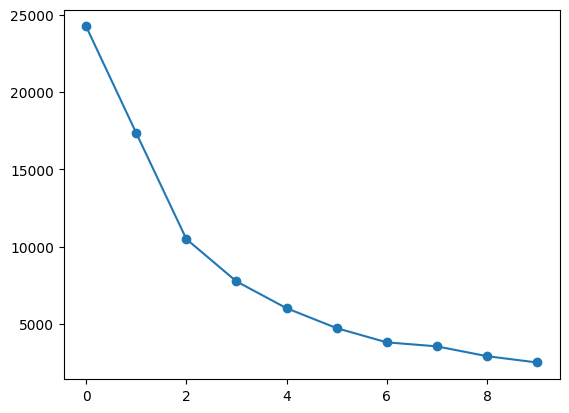

In [ ]:
#determine the number of clusters

from sklearn.cluster import KMeans

inertia = []

for i in np.arange(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(RFM_scaled)
  inertia.append(kmeans.inertia_)

plt.plot(inertia, marker="o")

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM_scaled)
RFM['Clusters']=(kmeans.labels_+1)

RFM.head()

,recency,frequency,monetary,Clusters
CustomerID,,,,
12346,347,2,0.00,2
12347,24,7,4310.00,1
12348,97,4,1797.24,1
12349,40,1,1757.55,1
12350,332,1,334.40,2


In [ ]:
#Understanding the customer segmentation

RFM_agg = RFM.groupby(['Clusters'])[['recency', 'frequency','monetary']].mean()
RFM_agg

,recency,frequency,monetary
Clusters,,,
1,71.216774,4.233048,1465.367491
2,277.507330,1.247098,359.565633
3,28.200000,101.866667,103134.911333


*The most loyal customers (Loyal_CX) -- cluster 3 have low recency scores, high frequency scores and high monetary values. The average customer (Avg_cx) -- cluster 1 has a relatively higher recency score than the loyal customer but provides more in terms of monetary value. Customers in cluster 2 (dormant_cx) are low value customers because they made only an average of 1 purchase a long time ago and paid less.*

In [ ]:
#create function for segmenting customers

def func(row):
  if row['Clusters']==3:
    return 'Loyal_CX'
  elif row['Clusters']==1:
    return 'Avg_CX'
  else:
    return 'Dormant_CX'


In [ ]:
RFM['cust_type'] = RFM.apply(func, axis=1)

RFM.head(10)

,recency,frequency,monetary,Clusters,cust_type
CustomerID,,,,,
12346,347,2,0.00,2,Dormant_CX
12347,24,7,4310.00,1,Avg_CX
12348,97,4,1797.24,1,Avg_CX
12349,40,1,1757.55,1,Avg_CX
12350,332,1,334.40,2,Dormant_CX
12352,58,11,1545.41,1,Avg_CX
12353,226,1,89.00,2,Dormant_CX
12354,254,1,1079.40,2,Dormant_CX
12355,236,1,459.40,2,Dormant_CX


In [ ]:

results = RFM['cust_type'].value_counts()

results

,count
cust_type,
Avg_CX,4793
Dormant_CX,3274
Loyal_CX,15


<Axes: xlabel='cust_type'>

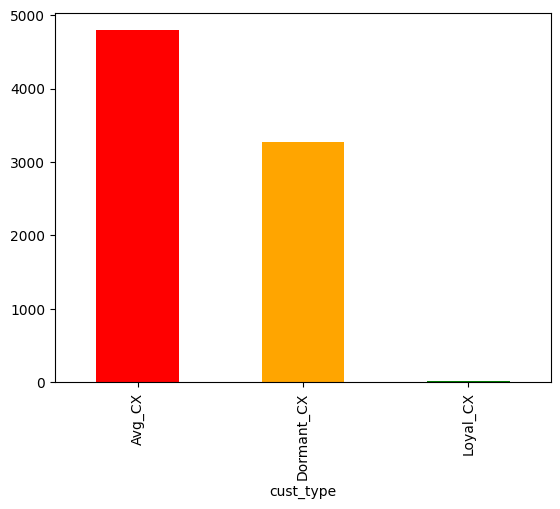

In [ ]:
results.plot(kind='bar', color=['red','orange','green'])

In [ ]:
percentage_distribution = RFM['cust_type'].value_counts(normalize=True) * 100
print(percentage_distribution)

cust_type
Avg_CX        59.304628
Dormant_CX    40.509775
Loyal_CX       0.185598
Name: proportion, dtype: float64


##**Conclusion for RFM analysis**

######Eventhough more than half of this company's customers for 2010-2011 are average customers, they are only spending approximately 1.42% of what a loyal customer spends on average. To increase revenue and maximise profits, the company needs to adopt marketing strategies that convert these average customers into loyal customers.

Great! Now we can download and explore further using PowerBI!

In [ ]:
#convert data to excel

from google.colab import files

RFM.to_excel('RFM_analysis.xlsx')
files.download('RFM_analysis.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.to_csv('Online_retail_clean.csv')
files.download('Online_retail_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>